In [6]:
import numpy as np;
import pandas as pd;
from matplotlib.pyplot import subplots
rng = np.random.default_rng(5797395);
import kagglehub
from ISLP import load_data;



#### Working with the College dataset

Just getting familiar with loading data and looking at it through the scattermatrix and histograms

#### Working with the Auto dataset

Further investigating data through a custom summary for each feature and the correlation matrix (the closest a value is to 1 or -1, the strongest is the correclation between two features). Weight and Horsepower for example have a strong positive correlation with 0.93

(array([704.,  50.,  13.,   5.,   3.,   1.,   0.,   0.,   0.,   1.]),
 array([1.00000e+00, 2.18450e+03, 4.36800e+03, 6.55150e+03, 8.73500e+03,
        1.09185e+04, 1.31020e+04, 1.52855e+04, 1.74690e+04, 1.96525e+04,
        2.18360e+04]),
 <BarContainer object of 10 artists>)

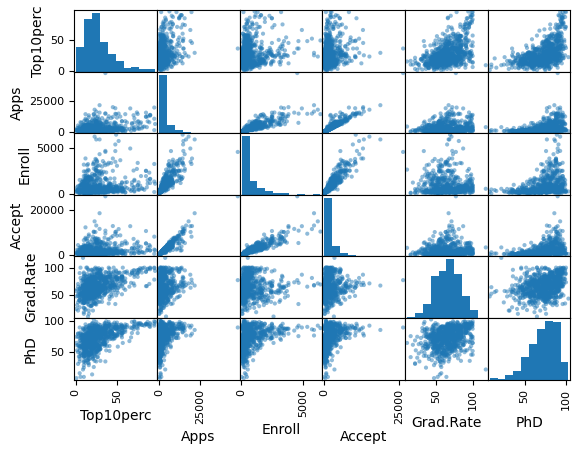

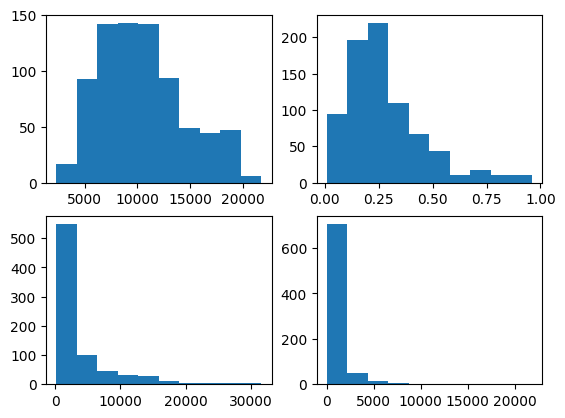

In [7]:
College = load_data('College')
#print(College.iloc[:,0])
College.index = College.iloc[:,0] 
College = College.drop(College.columns[[0]], axis=1)
#print(College)
#College.describe()
pd.plotting.scatter_matrix(College[['Top10perc','Apps','Enroll','Accept','Grad.Rate','PhD']])
#College
fig, ax = subplots(2,2)
#College.boxplot('Outstate', by='Private', ax=ax);
College['Top10perc'] = College['Top10perc']/100
College['Elite'] = pd.cut(College['Top10perc'],
[0,0.5,1],
labels=['No', 'Yes'])
College['Elite'].value_counts()
#College.boxplot('Outstate', by='Elite', ax=ax);
ax[0,0].hist(College['Outstate'])
ax[0,1].hist(College['Top10perc'])
ax[1,0].hist(College['F.Undergrad'])
ax[1,1].hist(College['P.Undergrad'])

                            mpg  cylinders  displacement  horsepower  weight  \
name                                                                           
chevrolet chevelle malibu  18.0          8         307.0         130    3504   
buick skylark 320          15.0          8         350.0         165    3693   
plymouth satellite         18.0          8         318.0         150    3436   
amc rebel sst              16.0          8         304.0         150    3433   
ford torino                17.0          8         302.0         140    3449   

                           acceleration  year  origin  
name                                                   
chevrolet chevelle malibu          12.0    70       1  
buick skylark 320                  11.5    70       1  
plymouth satellite                 11.0    70       1  
amc rebel sst                      12.0    70       1  
ford torino                        10.5    70       1  
Summary for Dataframe
Range of column "mpg" is 

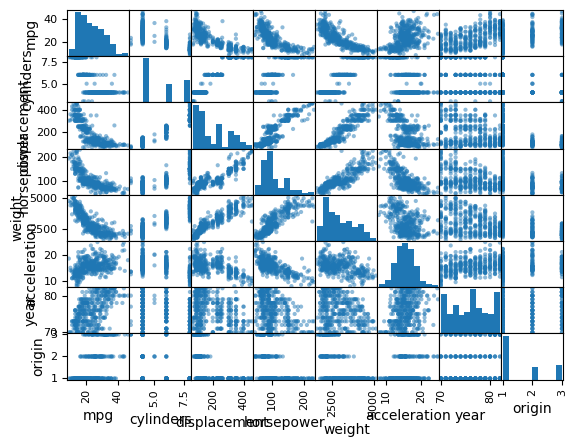

In [13]:
Auto = load_data('Auto')
print(Auto.head())
Auto_dna = Auto.dropna()
def cust_summary(df):
    print('Summary for Dataframe')
    for column in df.columns:
        print('Range of column "' + column + '" is ' + str(df[column].min()) + ' - ' + str(df[column].max()))
        print('Mean is ' + str(df[column].mean()) + ' and standard deviation is ' + str(df[column].std()))

Auto_dropped = Auto.drop(Auto.index[9:85])
Auto_dropped_2 = pd.concat([Auto.iloc[:10], Auto.iloc[86:]])
cust_summary(Auto)
cust_summary(Auto_dropped_2)
print(Auto.shape)
print(Auto_dropped.shape)
print(Auto_dropped_2.shape)
Auto.index[:].duplicated()
pd.plotting.scatter_matrix(Auto)
print(Auto.corr())

#### Working with the housing dataset

With a custom scatterplot-matrix, printing specific rows, and the correlation matrix again

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  
18.455533596837945
        CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
398  38.3518  0.0   18.1     0  0.693  5.453  100.0  1.4896   24  666   
405  67.9208  0.0   18.1     0  0.693  5.683  100.0  1.4254   24  666   

     PTRATIO  LSTAT  MEDV  
398     20.2  30.59   5.0  
405     20.2  22.98   5.0  
(8, 13)
64
13
             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \

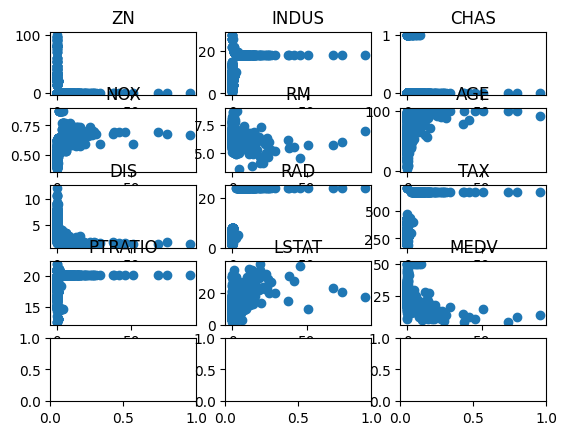

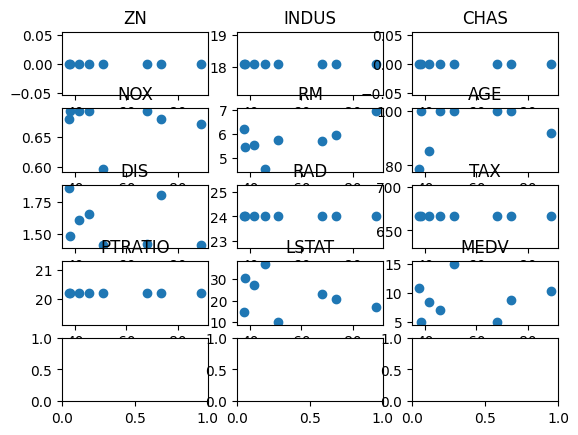

In [18]:
def cscatter_plots(df,col):
    num = len(df.columns)
    fig, ax = subplots((num-1) // 3 +1,3)
    i = 0
    for column in df.drop(columns=[col]).columns:
        ax[i // 3,i % 3].plot(df[col], df[column], 'o')
        ax[i // 3,i % 3].set_title(column)
        i += 1

Boston = load_data('Boston')
print(Boston.head())
Boston.describe()
#cust_summary(Boston)
Boston.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT','MEDV']
Boston
cscatter_plots(Boston,'CRIM')
print(Boston['PTRATIO'].mean())
print(Boston[Boston['MEDV'] == Boston['MEDV'].min()])

Boston_crim = Boston.loc[(Boston['CRIM'] > 30) & (Boston['TAX'] > 500) & (Boston['PTRATIO'] > 20)]
Boston_crim.describe()
cscatter_plots(Boston_crim,'CRIM')
print(Boston_crim.shape)

print(len(Boston.loc[Boston['RM'] > 7]))
print(len(Boston.loc[Boston['RM'] > 8]))
Boston.loc[Boston['RM'] > 8]
print(Boston.corr())
